<a href="https://colab.research.google.com/github/C-25/COLLEGERANKER-India/blob/main/GOLD_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHIRAG GHOSH**

# <center> Gold Price Prediction

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Task 1: Initial Data Exploration

In [ ]:
data = pd.read_csv('gold_price.csv',parse_dates=True,index_col='Date') #,parse_dates=True, index_col='Date'
data.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [ ]:
data.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [ ]:
data.shape

(4718, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4718 entries, 2001-01-02 to 2019-09-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   USD (AM)   4718 non-null   float64
 1   USD (PM)   4682 non-null   float64
 2   GBP (AM)   4718 non-null   float64
 3   GBP (PM)   4682 non-null   float64
 4   EURO (AM)  4718 non-null   float64
 5   EURO (PM)  4682 non-null   float64
dtypes: float64(6)
memory usage: 258.0 KB


In [ ]:
data.describe()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
count,4718.000000,4682.000000,4718.000000,4682.000000,4718.000000,4682.000000
mean,959.990812,959.728684,625.068432,624.921846,773.892791,773.843716
std,449.456217,449.487106,324.491391,324.544149,351.555806,351.696708
min,256.700000,255.950000,176.572000,176.441000,276.711000,277.667000
25%,449.112500,448.612500,244.576750,244.463500,361.393500,361.338750
50%,1113.125000,1112.275000,717.145000,716.210500,874.354500,875.141500
75%,1293.750000,1294.225000,939.065500,939.266500,1085.967750,1085.816250
max,1896.500000,1895.000000,1265.900000,1265.010000,1389.890000,1392.030000


In [ ]:
data.isnull()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,False,False,False,False,False,False
2001-01-03,False,False,False,False,False,False
2001-01-04,False,False,False,False,False,False
2001-01-05,False,False,False,False,False,False
2001-01-08,False,False,False,False,False,False
...,...,...,...,...,...,...
2019-08-27,False,False,False,False,False,False
2019-08-28,False,False,False,False,False,False
2019-08-29,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

USD (AM)      0
USD (PM)     36
GBP (AM)      0
GBP (PM)     36
EURO (AM)     0
EURO (PM)    36
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

USD (AM)     0
USD (PM)     0
GBP (AM)     0
GBP (PM)     0
EURO (AM)    0
EURO (PM)    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

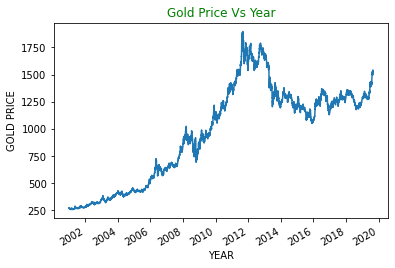

In [ ]:
#graphical representation of gold price vs year
plt.title('Gold Price Vs Year',color='Green')
data['USD (AM)'].plot()
plt.xlabel('YEAR')
plt.ylabel('GOLD PRICE')
plt.show()


## Task 2: Create Train & Test Sets

In [ ]:
data['MA_5'] = data['USD (AM)'].rolling(window = 5).mean()
data['MA_10'] = data['USD (AM)'].rolling(window = 10).mean()
data=data.dropna()

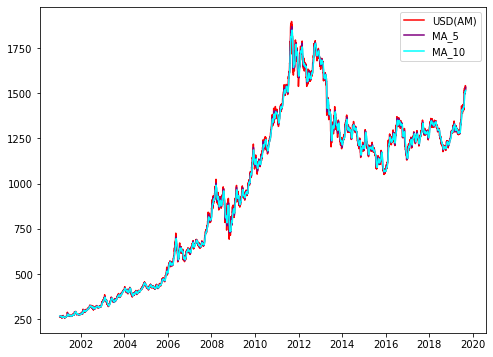

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(data['USD (AM)'],label= 'Given_price', color='Red')
plt.plot(data['MA_5'],label= 'Moving average 5 Days', color='Purple')
plt.plot(data['MA_10'],label= 'Moving average 10 Days', color='cyan')

plt.legend(['USD(AM)','MA_5','MA_10'])
plt.show()
            

In [ ]:
#train and test spliting

x=data[['MA_5','MA_10']]
y=data['USD (AM)']

t=0.8
t=int(t*len(data))
x_train,x_test,y_train,y_test = x[:t].round(4),x[t:].round(4), y[:t].round(4),y[t:].round(4)

## Task 3: Develop Models & Predictions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
test_data_prediction = regressor.predict(x_test)

In [ ]:
y_test = list(y_test)

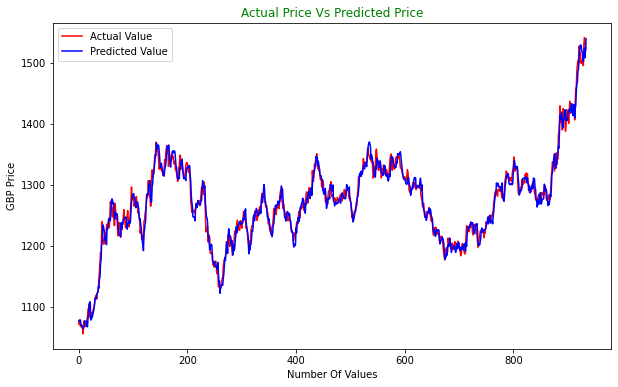

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label= 'Actual Value',color='red')

plt.plot(test_data_prediction,label= 'Predicted Value', color='blue')
plt.title('Actual Price Vs Predicted Price',color='Green')
plt.xlabel('Number Of Values')
plt.ylabel('GBP Price')

plt.legend()
plt.show()

In [ ]:
error_score = metrics.r2_score(y_test,test_data_prediction)*100
print("R squared error :", error_score)

R squared error : 97.6069243426277


# **THANK YOU**